# 팩토리 패턴 이해하기

> 팩토리패턴은 특정 패토리 클래스나 메소드 등을 이용해서 다른 객체를 생성하는 것을 말한다.

## 1. 생성자를 수정해서 다른 클래스의 객체를 생성하기

### 객체가 생성될 클래스를 정의

In [3]:
class A :
    pass

### 다른 객체를 생성할 팩토리 클래스를 정의 
>> : 실제 생성자에 반환하는 것은 인자로 넘겨준 클래스의 객체

In [4]:
class Factory :
    def __new__(cls, Class) :
        return super().__new__(Class)

### 팩토리 클래스로 사용자 클래스의 객체를 생성한다

In [5]:
a = Factory(A)

In [6]:
a

### 사용자 클래스로 객체를 생성한다

In [7]:
b = A()

In [8]:
b

### 사용자 클래스와 생성된 객체간의 관계를 확인한다

In [9]:
isinstance(a,A)

True

In [10]:
isinstance(b,A)

True

## 2. 팩토리 클래스 내의 메소드를 이용해서 다른 클래스의 객체를 생성하기 

###  사용자 클래스를 정의한다

In [11]:
class B :
    pass

### 팩토리 클래스를 정의 
>  다른 클래스의 객체를 생성하는 클래스 메소드를 정의
>> 메소드의 인자로 문자열을 받으므로 이 문자열을 변수로 변환하기 위해 eval 함수를 실행한다.

In [16]:
class Factory_ :
    @classmethod
    def make_instance(cls, class_type) :
        return eval(class_type)()

###  팩토리 클래스로 바로 접근해서 클래스메소드를 호출

In [17]:
c = Factory_.make_instance('B')

### 생성된 객체를 확인하면 사용자 정의 클래스라는 것을 알 수 있다.

In [18]:
c

In [19]:
isinstance(c, B)

True

## 3. 단순 팩토리 클래스를 이용하기

> 사용자 클래스가 정의된 것을 그대로 이용해서 단순하게 생성만 처리한다. 

> 실제 파이썬은  추상 클래스 정의 없이도 동일한 패턴을 만들 수 있다. 

### 추상클래스 정의를 위한 모듈 abc를 사용한다

In [22]:
import abc

### 추상클래스 생성하기

> 추상 메타클래스를 이용해서 추상클래스 정의하기 

In [24]:
class things(metaclass= abc.ABCMeta) :
    @abc.abstractmethod
    def say(self) :
        pass

### 추상클래스를 상속해서 메소드를 구현하기 

> 동일한 인터페이스가 필요할 경우 사용한다.

In [25]:
class Person(things) :
    def say(self) :
        return "엉엉엉"

In [26]:
class Dog(things) :
    def say(self) :
        return " 멍멍멍 "

### 팩토리 클래스 정의

In [27]:
class Fact_things :
    @classmethod
    def make_instance(cls, class_type) :
        return eval(class_type)()

### 타입 정보를 입력받아 처리하기 

In [28]:
class_type = input(" Person or Dog ")

 Person or Dog Dog


In [29]:
d = Fact_things.make_instance(class_type)

In [30]:
d.say()

' 멍멍멍 '

In [32]:
class_type = input(" Person or Dog ")

 Person or Dog Person


In [33]:
p = Fact_things.make_instance(class_type)

In [34]:
p.say()

'엉엉엉'

## 4. 팩토리  메소드로 클래스를 생성하기 

> 생성되어야 객체와 그 내부에 관리하는 객체들이 조합이 다를 경우 이를 묶어서 새로운 클래스의 객체를 생성



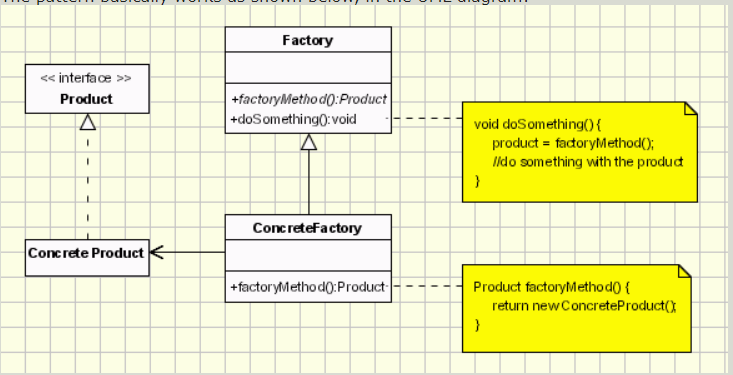

In [42]:
from IPython.display import Image
Image(filename='팩토리메소드이미지.png') 

In [35]:
import abc

### 새로운 클래스내에 사용될 다양한 객체들을 만든다. 

In [41]:
class Things(metaclass=abc.ABCMeta) :
    @abc.abstractmethod
    def cry(self) :
        pass
    
    @abc.abstractmethod
    def say(self) :
        pass

In [43]:
class People(Things) :
   
    def cry(self) :
        return "엉엉엉"
    

    def say(self) :
        return " 뭐하니 "

In [84]:
class Dog(Things) :
   
    def cry(self) :
        return " 머어엉"
    

    def say(self) :
        return " 멍멍멍 "

### 팩토리 추상 클래스를 만든다

> 생성을 위한 추상클래스에서 객체를 처리하기 위해서는 생성자에 생성에 가능한 클래스를 처리해야 한다.

> 생성을 위한 메소드를 정의할 때 구현 클래스에서 실제 생성이 가능하도록 수정해야 한다

In [72]:
class ABCCreator(metaclass=abc.ABCMeta) :
    def __new__(self,class_type) :
        self.class_type = class_type
        print("class_type", class_type)
        return  self.creat(self)
        
    @abc.abstractmethod
    def creat(self) :
        pass

In [ ]:
### 생성이 가능한 정보는 class_type에 저장해서 이를 eval로 처리해서 외부으

In [73]:
class Creator(ABCCreator) :
    def creat(self) :
        print(" Creator ")
        return eval(self.class_type)()
        

In [74]:
p = Creator('People')

class_type People
 Creator 


In [75]:
p

In [77]:
p.say()

' 뭐하니 '

In [78]:
p.cry()

'엉엉엉'

In [85]:
d = Creator('Dog')

class_type Dog
 Creator 


In [86]:
d

In [87]:
d.cry()

' 머어엉'

In [88]:
d.say()

' 멍멍멍 '